## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


![airplane accident](https://gifdb.com/images/high/plane-jet-crash-explosion-jy9cqg43kri1oa2m.webp)
Source: [GIFDB.com](https://gifdb.com/)

# **OVERVIEW**
As part of the company's strategic growth into new markets, there is increasing interest in joining the aviation industry. The goal is to purchase and operate aircraft for both commercial and private enterprises. However, before making any decisions, the business needs to be aware of the possible dangers associated with various aircraft types.   

This analysis focuses on identifying the lowest-risk aircraft models by reviewing data from the National Transportation Safety Board (NTSB) aviation accident database. The key indicators to be evaluated are damage to the aircraft, frequency of accidents/incidents and severity of injuries.

Ultimately, this analysis will provide the company, under the guidance of the Head of the new Aviation Division, with data-driven insights and recommendations about which aircraft models to invest in for this new business venture.

# **BUSINESS PROBLEM**

## **Business Questions**
1. Which aircraft models have the lowest accident rates?
2. Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?
3. What are the trends over time, and how do they impact decision-making for future aircraft purchases?

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **DATA UNDERSTANDING**
[Data Description](https://andreantonacci.github.io/aviation-accidents/#:~:text=As%20predicted%2C%20the%20majority%20of,%2C%20bad%20weather)

[Data Source (Kaggle)](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

In [ ]:
# import data and create df
# df = pd.read_csv("AviationData.csv") # encoding issues
df = pd.read_csv("AviationData.csv", encoding="latin-1")

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Event.Year', 'Event.Month'],
      dtype='object')

In [ ]:
df.shape

# 88889 events, 31 columns

(88889, 31)

In [ ]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## **Data Cleaning**

In [ ]:
df.duplicated().sum()

# no duplicates

0

In [ ]:
# make df copy

data = df.copy()

### **Missing Values**

In [ ]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100


,0
Schedule,85.845268
Air.carrier,81.271023
FAR.Description,63.974170
Aircraft.Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport.Code,43.601570
Airport.Name,40.708074
Broad.phase.of.flight,30.560587
Publication.Date,15.492356


In [ ]:
for col in data.columns:
    print({col})
    print(data[col].unique())
    print()

{'Event.Id'}
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']

{'Investigation.Type'}
['Accident' 'Incident']

{'Accident.Number'}
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']

{'Event.Date'}
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

{'Location'}
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

{'Country'}
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa 

### **Convert `Event.Date` Column to `DateTime`**

In [ ]:
data['Event.Date'] = pd.to_datetime(data['Event.Date'])
data['Event.Date'].dtype # confirm datatype

dtype('<M8[ns]')

In [ ]:
data['Event.Date'].head()

,Event.Date
0,1948-10-24
1,1962-07-19
2,1974-08-30
3,1977-06-19
4,1979-08-02


In [ ]:
# extract year and month and create Event.Year and Event.Month columns

data["Event.Year"] = data["Event.Date"].dt.year
data["Event.Month"] = data["Event.Date"].dt.month_name()
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Event.Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,October
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,July
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,August
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,June
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,August


# EXPLORATORY DATA ANALYSIS

EDA columns  
Event.Id  
Country  

Which aircraft models have the lowest accident rates?
Model

Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?

Weather.Condition  
Broad.phase.of.flight  



### **Event Types**

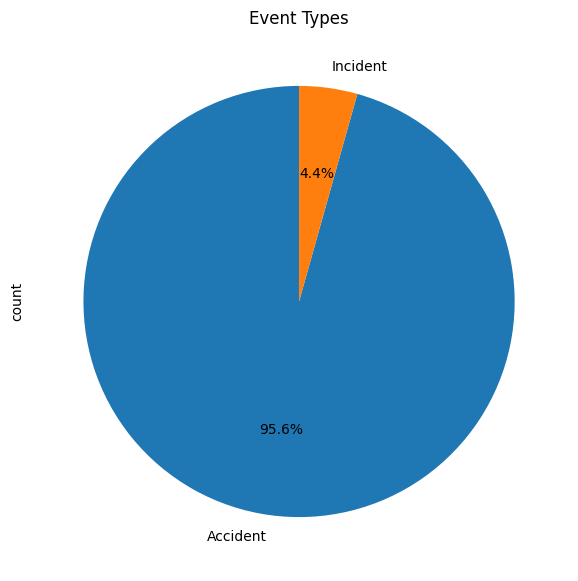

In [ ]:
plt.figure(figsize=(10, 7))
data["Investigation.Type"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Event Types")
plt.show()


For every single incident, there are approximately 20 accidents. Given the substantial disparity between incidents and accidents, all events will be aggregated into one category (Events) for simplification.

## **Count of Events by Country**

In [ ]:
data["Country"].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

In [ ]:
data["Country"].nunique()

219

In [ ]:
accidents_country = data.groupby("Country").size().reset_index(name="Count")
accidents_country.sort_values(by="Count", ascending=False)


,Country,Count
207,United States,82248
29,Brazil,374
35,Canada,359
127,Mexico,358
206,United Kingdom,344
...,...,...
172,Seychelles,1
173,Sierra Leone,1
40,Chad,1
186,St Lucia,1


### **Top 10 countries with highest number of accidents**

In [ ]:
top_15_countries = accidents_country.sort_values(by="Count", ascending=False).head(15)
top_15_countries

,Country,Count
207,United States,82248
29,Brazil,374
35,Canada,359
127,Mexico,358
206,United Kingdom,344
13,Australia,300
66,France,236
184,Spain,226
16,Bahamas,216
73,Germany,215


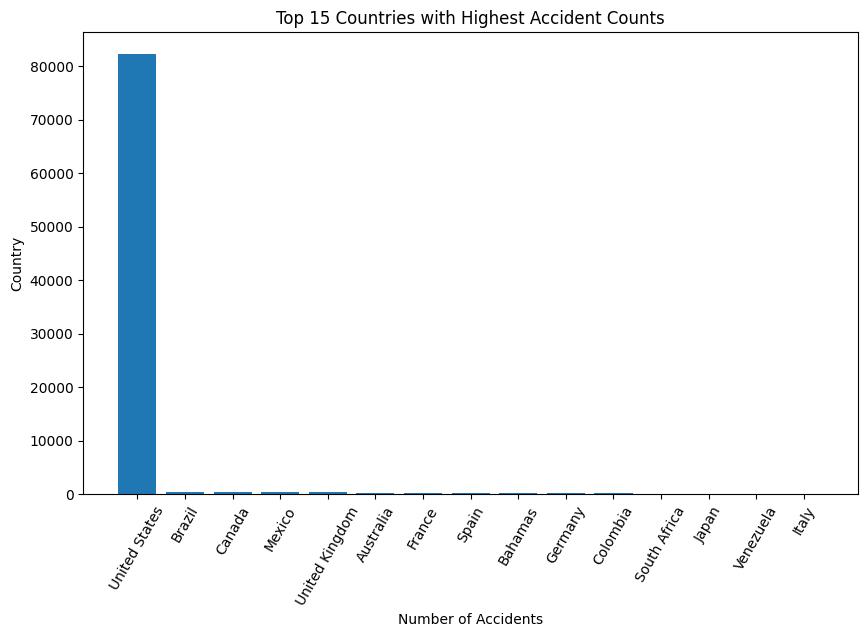

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_15_countries["Country"], top_15_countries["Count"])
plt.title("Top 15 Countries with Highest Accident Counts")
plt.xlabel("Number of Accidents")
plt.ylabel("Country")
plt.xticks(rotation=60)
plt.show()


US had the highest number of incidents and accidents.

In [ ]:
# events in US only
us_events = data[data["Country"] == "United States"]
us_events.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Event.Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,October
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,July
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,August
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,June
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,August


## **Count of Events per Year**

In [ ]:
events_per_year = data.groupby("Event.Year").size().reset_index(name="Count")
events_per_year

,Event.Year,Count
0,1948,1
1,1962,1
2,1974,1
3,1977,1
4,1979,2
5,1981,1
6,1982,3593
7,1983,3556
8,1984,3457
9,1985,3096


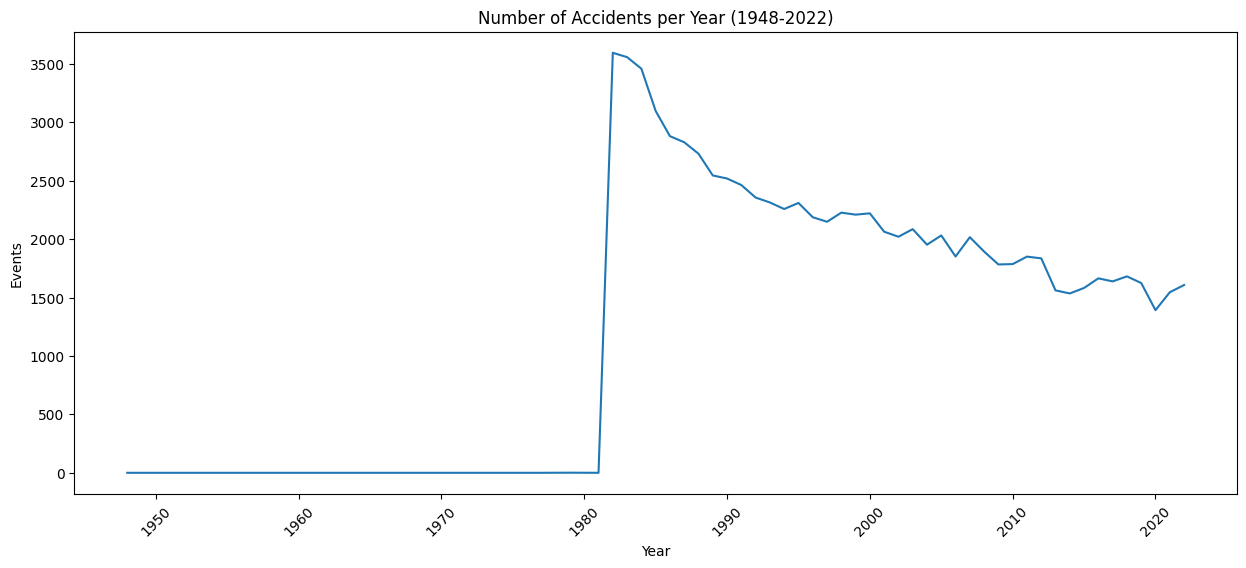

In [ ]:
# line plot of accidents per year

plt.figure(figsize=(15, 6))
sns.lineplot(x="Event.Year", y="Count", data=events_per_year)
plt.title("Number of Accidents per Year (1948-2022)")
plt.xlabel("Year")
plt.ylabel("Events")
plt.xticks(rotation=45)
plt.show()

## **Count of Events per Month**

In [ ]:
events_per_month = data.groupby("Event.Month").size().reset_index(name='Count')
events_per_month

,Event.Month,Count
0,April,7248
1,August,9986
2,December,5060
3,February,5285
4,January,4985
5,July,10698
6,June,9561
7,March,6686
8,May,8514
9,November,5538


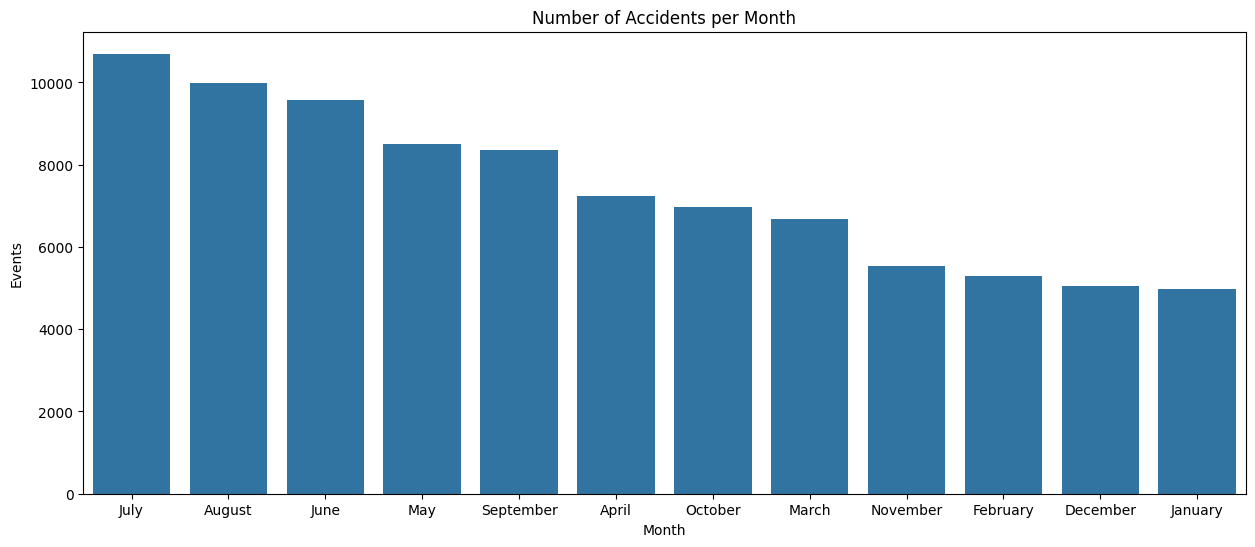

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Event.Month", y="Count", data=events_per_month.sort_values(by="Count", ascending=False))
plt.title("Number of Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Events")
plt.show()